## Sentiment Analysis on FOMC Meeting Minutes

In this notebook I have used the historical and current FOMC(Federal Open Market Committee) meeting minutes data set from Kaggle https://www.kaggle.com/datasets/vladtasca/fomc-meeting-statements-and-minutes  to perform a Sentiment Analysis on the meeting minute and analyse the impact of positive or negative sentiment on interest rate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline, AutoTokenizer


pd.pandas.set_option('display.max_colwidth', None)
pd.pandas.set_option('display.max_row', None)

In [2]:
# loading the data
df = pd.read_csv('../Data/communications.csv')  

In [3]:
df.tail()

Date Release Date       Type  \
427  2000-05-16   2000-05-16  Statement   
428  2000-03-21   2000-05-18     Minute   
429  2000-03-21   2000-03-21  Statement   
430  2000-02-02   2000-03-23     Minute   
431  2000-02-02   2000-02-02  Statement   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [4]:
# Initialize the tokenizer and sentiment analysis pipeline 

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

In [5]:
def chunk_text(text, max_length=512, stride=256):
    words = text.split()
    chunks = []
    current_chunk = []
    current_length = 0

    for word in words:
        # If adding the current word exceeds the maximum length, start a new chunk
        if current_length + len(word.split()) > max_length:
            
            # Truncate the current chunk if it exceeds the maximum length
            truncated_chunk = ' '.join(current_chunk)[:max_length]
            chunks.append(truncated_chunk)
            current_chunk = [word]
            current_length = len(word.split())
        else:
            current_chunk.append(word)
            current_length += len(word.split())

    # Add the last chunk if it is not empty
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    # Further truncate chunks which exceeds the maximum length
    truncated_chunks = []
    for chunk in chunks:
        for i in range(0, len(chunk), stride):
            truncated_chunks.append(chunk[i:i+max_length])

    return truncated_chunks


In [6]:
# Function to get sentiment for the text, handling long texts by chunking

def get_sentiment(text):
    chunks = chunk_text(text)
    sentiments = [sentiment_pipeline(chunk)[0] for chunk in chunks]
    avg_score = sum(sent['score'] for sent in sentiments) / len(sentiments)
    return sentiments[0]['label'], avg_score


In [7]:

# Apply sentiment analysis

df['sentiment_label'], df['sentiment_score'] = zip(*df['Text'].apply(get_sentiment))

In [8]:
df.sentiment_score

0      0.919959
1      0.955954
2      0.932256
3      0.915925
4      0.951718
5      0.934178
6      0.950850
7      0.921987
8      0.853753
9      0.911368
10     0.907438
11     0.926880
12     0.934760
13     0.912574
14     0.945818
15     0.910940
16     0.912330
17     0.921019
18     0.929877
19     0.882231
20     0.916988
21     0.875219
22     0.867434
23     0.923902
24     0.925206
25     0.865262
26     0.951903
27     0.933198
28     0.877998
29     0.880127
30     0.874047
31     0.897049
32     0.837863
33     0.941476
34     0.924923
35     0.934557
36     0.909823
37     0.922442
38     0.929382
39     0.895141
40     0.936561
41     0.913972
42     0.945885
43     0.931723
44     0.942872
45     0.942408
46     0.915048
47     0.916631
48     0.955343
49     0.918355
50     0.896432
51     0.930908
52     0.902033
53     0.895378
54     0.941886
55     0.894542
56     0.932234
57     0.949613
58     0.884261
59     0.929646
60     0.935531
61     0.934220
62     0

In [9]:
df['sentiment_label'].value_counts()

sentiment_label
POSITIVE    252
NEGATIVE    180
Name: count, dtype: int64

In [10]:
# Convert sentiment labels to numerical values
df['sentiment'] = df['sentiment_label'].map({'NEGATIVE': 0, 'POSITIVE': 1})

In [11]:
df.columns

Index(['Date', 'Release Date', 'Type', 'Text', 'sentiment_label',
       'sentiment_score', 'sentiment'],
      dtype='object')

In [12]:
df[['sentiment_score','sentiment','sentiment_label']]

,sentiment_score,sentiment,sentiment_label
0,0.919959,1,POSITIVE
1,0.955954,0,NEGATIVE
2,0.932256,0,NEGATIVE
3,0.915925,1,POSITIVE
4,0.951718,0,NEGATIVE
5,0.934178,1,POSITIVE
6,0.950850,1,POSITIVE
7,0.921987,1,POSITIVE
8,0.853753,1,POSITIVE
9,0.911368,1,POSITIVE


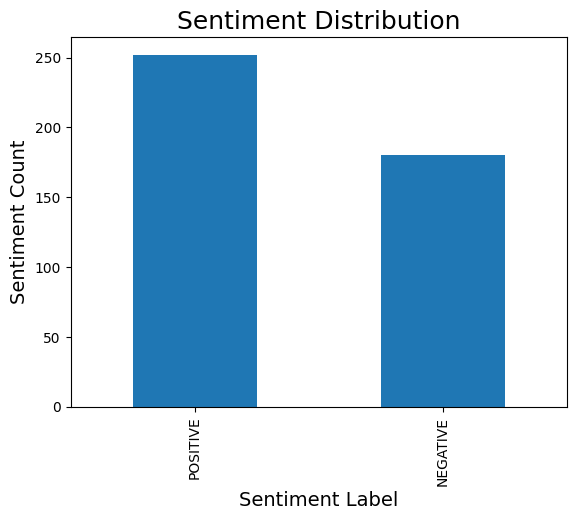

In [15]:
# Barchart for Sentiments
sentiment_cnt = df['sentiment_label'].value_counts()
sentiment_cnt.plot(kind='bar')
plt.title('Sentiment Distribution', fontsize = 18)
plt.xlabel('Sentiment Label', fontsize=14)
plt.ylabel('Sentiment Count', fontsize=14)
plt.show()

In [18]:
df.columns

Index(['Date', 'Release Date', 'Type', 'Text', 'sentiment_label',
       'sentiment_score', 'sentiment'],
      dtype='object')

In [28]:
df1 = df[(df['Release Date']>='2023-01-01')&(df['Release Date']<'2024-01-01')]

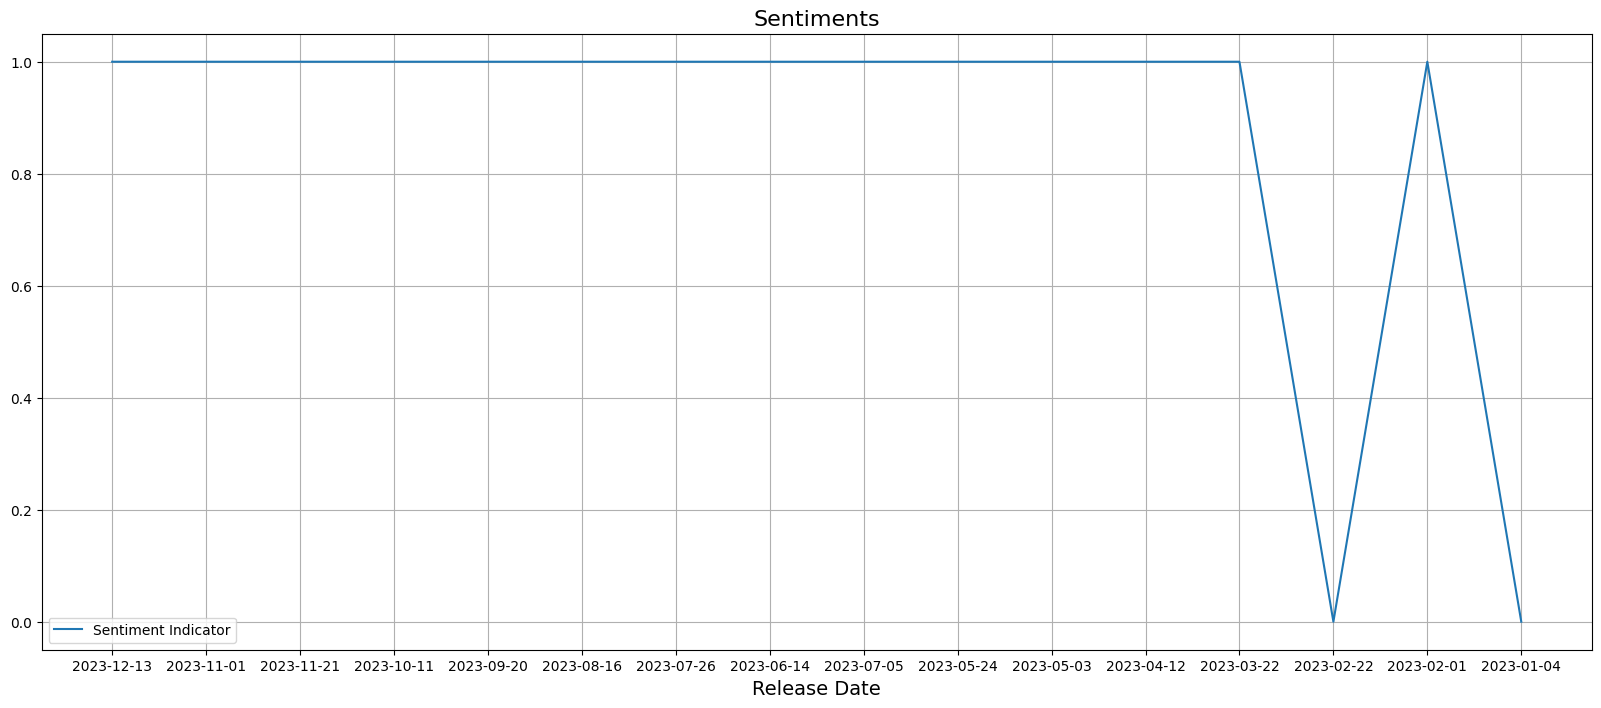

In [30]:

# plot Sentiments over time
plt.figure(figsize=(20, 8))
plt.plot(df1['Release Date'], df1['sentiment'], label ='Sentiment Indicator')
plt.xlabel('Release Date', fontsize=14)
plt.title('Sentiments', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
#plt.savefig('../Graph/MortgageRate_over_time.png', dpi = 192);

In [31]:
df_mortgage = pd.read_csv('../Data/fred_mortg_data_clean.csv')

In [33]:
df_mortgage1 = df_mortgage[(df_mortgage['DATE']>='2023-01-01')&(df_mortgage['DATE']<'2024-01-01')]


In [34]:
df_mortgage1.columns

Index(['DATE', 'MORTGAGE30US', 'FEDFUNDS', 'GS10', 'MICH', 'UNRATE', 'USREC',
       'CSUSHPISA', 'MSACSR', 'GDP'],
      dtype='object')

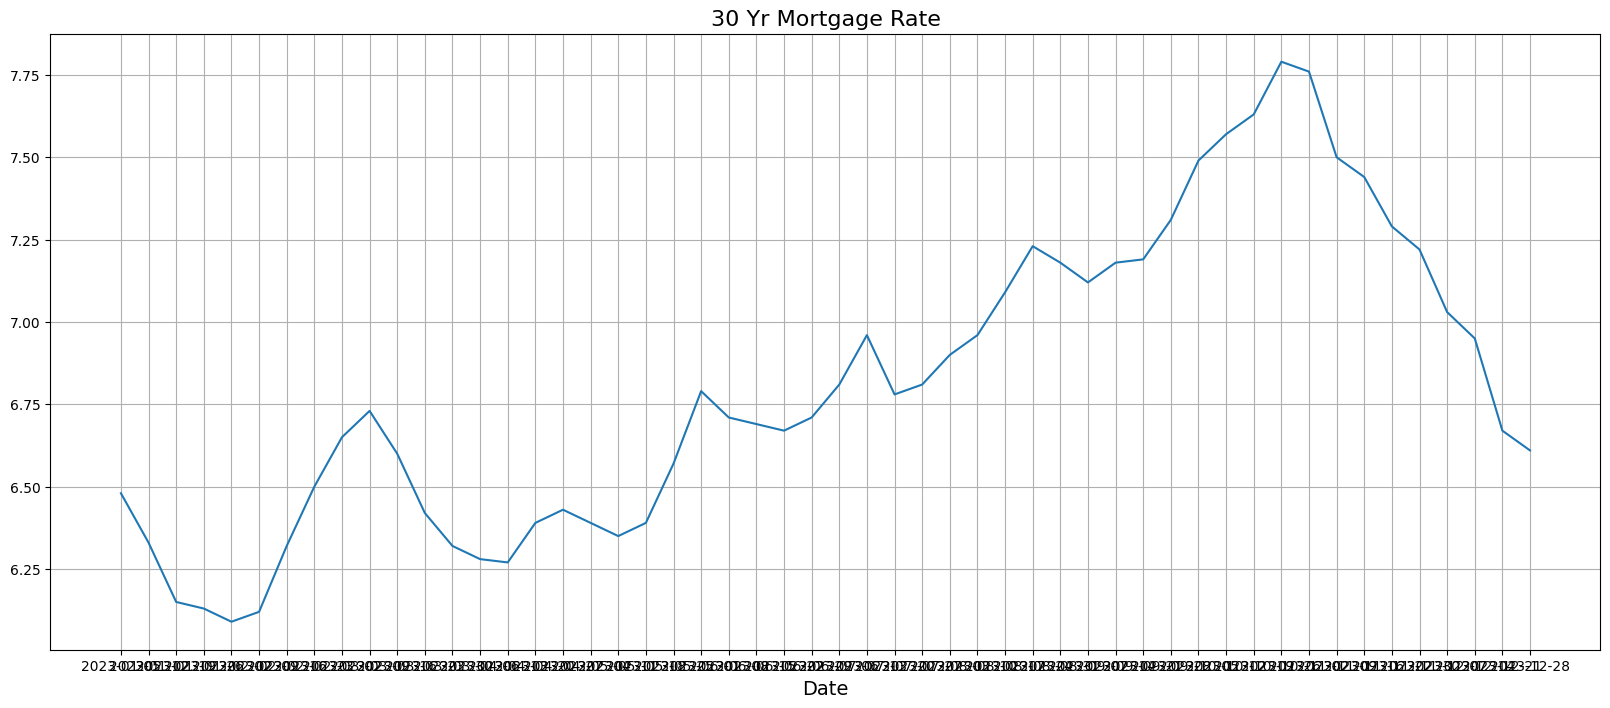

In [39]:


# plot Sentiments over time
plt.figure(figsize=(20, 8))
plt.plot(df_mortgage1['DATE'], df_mortgage1['MORTGAGE30US'])
plt.xlabel('Date', fontsize=14)
plt.title('30 Yr Mortgage Rate', fontsize=16)
plt.grid(True)
plt.show()